In [2]:
import pandas as mypanda
from scipy import stats
import matplotlib.pyplot as myplot
from statsmodels.formula.api import ols

In [3]:
myData=mypanda.read_csv('vocation_dummy_Reg.csv')
myData

,SL No,Gender,Income,Attitude
0,1,1,1,2
1,2,1,1,3
2,3,1,1,1
3,4,1,1,1
4,5,1,1,2
5,6,1,2,4
6,7,1,2,5
7,8,1,2,5
8,9,1,2,6
9,10,1,2,6


In [4]:
gender=myData.Gender
income=myData.Income
attitude=myData.Attitude

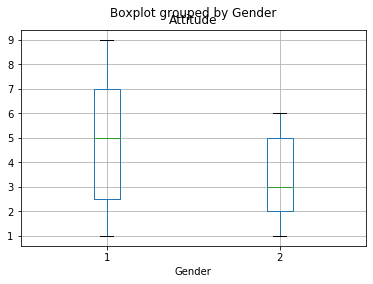

In [5]:
myData.boxplot(column='Attitude', by='Gender')
myplot.show()

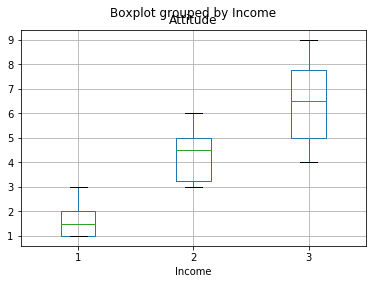

In [6]:
myData.boxplot(column='Attitude', by='Income')
myplot.show()

In [7]:
mymodel = ols('attitude ~ C(gender) + C(income)', myData).fit()

In [8]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     53.37
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.02e-11
Time:                        13:56:41   Log-Likelihood:                -37.916
No. Observations:                  30   AIC:                             83.83
Df Residuals:                      26   BIC:                             89.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4000      0.336      7.145      0.000       1.710       3.090
C(gender)[T.2]    -1.6000      0.336     -4.763      0.000      -2.290      -0.910
C(income)[T.2]     2.8000      0.411      6.806      0.000       1.954       3.646
C(income)[T.3]     4.8000      0.411     11.668      0.000       3.954       5.646
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.615
Skew:                           0.089   Prob(JB):                        0.735
Kurtosis:                       2.322   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
pred = mymodel.predict()

In [10]:
pred

array([2.4, 2.4, 2.4, 2.4, 2.4, 5.2, 5.2, 5.2, 5.2, 5.2, 7.2, 7.2, 7.2,
       7.2, 7.2, 0.8, 0.8, 0.8, 0.8, 0.8, 3.6, 3.6, 3.6, 3.6, 3.6, 5.6,
       5.6, 5.6, 5.6, 5.6])

In [11]:
residue = attitude-pred
residue

0    -0.4
1     0.6
2    -1.4
3    -1.4
4    -0.4
5    -1.2
6    -0.2
7    -0.2
8     0.8
9     0.8
10    0.8
11    1.8
12    0.8
13   -0.2
14   -0.2
15    0.2
16    0.2
17    1.2
18    1.2
19    0.2
20   -0.6
21    0.4
22    1.4
23   -0.6
24   -0.6
25   -0.6
26   -0.6
27   -0.6
28   -1.6
29    0.4
Name: Attitude, dtype: float64

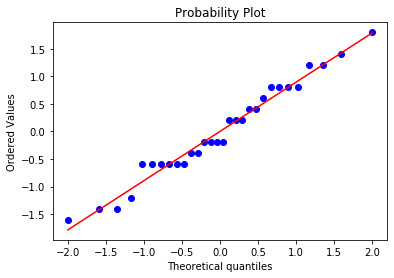

In [12]:
stats.probplot(residue, plot = myplot)
myplot.show()

In [13]:
stats.normaltest(residue)

NormaltestResult(statistic=0.5211198961155503, pvalue=0.7706199578215539)

In [14]:
from statsmodels.stats.anova import anova_lm
anova_table = anova_lm(mymodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.200000,19.200000,22.690909,6.274380e-05
C(income),2.0,116.266667,58.133333,68.703030,4.189551e-11
Residual,26.0,22.000000,0.846154,NaN,NaN


In [15]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.200000,19.200000,22.690909,6.274380e-05
C(income),2.0,116.266667,58.133333,68.703030,4.189551e-11
Residual,26.0,22.000000,0.846154,NaN,NaN
